Part 1: Machine Learning Models
You work for an office transport company. You are in discussions with ABC Consulting company for
providing transport for their employees. For this purpose, you are tasked with understanding how do the
employees of ABC Consulting prefer to commute presently (between home and office). Based on the
parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’, you are required to
predict the preferred mode of transport. The project requires you to build several Machine Learning
models and compare them so that the model can be finalised.


Data Dictionary




Age : Age of the Employee in Years

Gender : Gender of the Employee

Engineer : For Engineer =1 , Non Engineer =0

MBA : For MBA =1 , Non MBA =0

Work Exp : Experience in years

Salary : Salary in Lakhs per Annum

Distance : Distance in Kms from Home to Office

license : If Employee has Driving Licence -1, If not, then 0

Transport : Mode of Transport


The objective is to build various Machine Learning models on this data set and based on the accuracy
metrics decide which model is to be finalised for finally predicting the mode of transport chosen by the
employee.

### Import Libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import os
import matplotlib.style
plt.style.use('classic')
%matplotlib inline

In [ ]:

from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_csv("/content/drive/MyDrive/Machine_Learning/Cars.csv")

###Basic Summary

In [ ]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [ ]:
df.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


In [ ]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  444 
no. of columns:  9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
Age,0
Gender,0
Engineer,0
MBA,0
Work Exp,0
Salary,0
Distance,0
license,0
Transport,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


In [ ]:
df['Transport'].value_counts()

,count
Transport,
Public Transport,300
Private Transport,144


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,316
Female,128


In [ ]:
df.groupby('Transport').value_counts()

Transport          Age  Gender  Engineer  MBA  Work Exp  Salary  Distance  license
Private Transport  18   Male    0         0    0         6.7     13.0      0          1
                   20   Female  1         0    2         9.0     16.2      0          1
                   28   Male    1         0    5         14.4    5.1       0          1
                   30   Male    1         0    8         15.0    15.5      1          1
                                                         14.9    15.5      1          1
                                                                                     ..
Public Transport   20   Male    0         1    2         8.8     8.3       0          1
                        Female  0         1    1         8.5     7.9       0          1
                   19   Female  1         0    1         7.5     8.1       0          1
                   18   Male    1         0    0         6.8     12.2      0          1
                   36   Male    1         1    18        28.7    10.4      1          1
Name: count, Length: 444, dtype: int64

###Univariate and Bivariate analysis

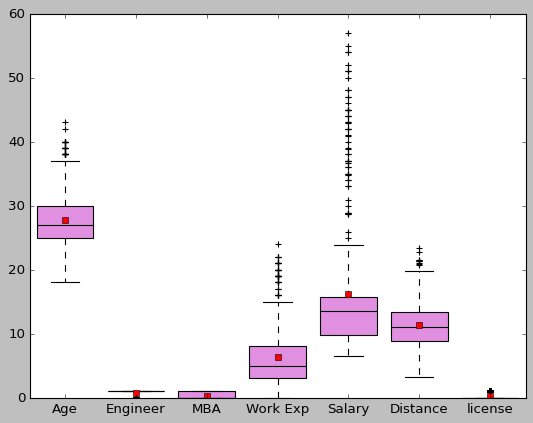

In [ ]:
sns.boxplot(color = 'violet',data = df, showmeans=True)
plt.show()

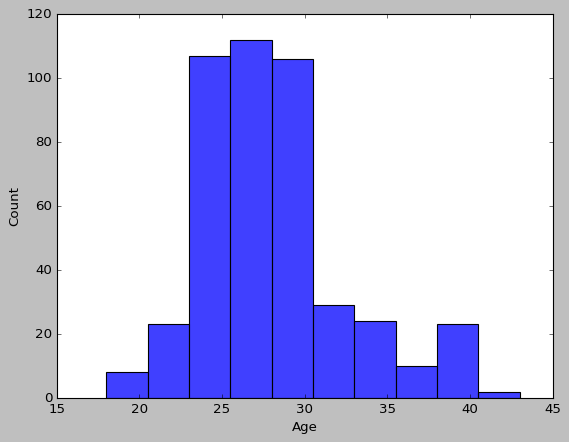

In [ ]:
sns.histplot(df['Age'],bins=10);

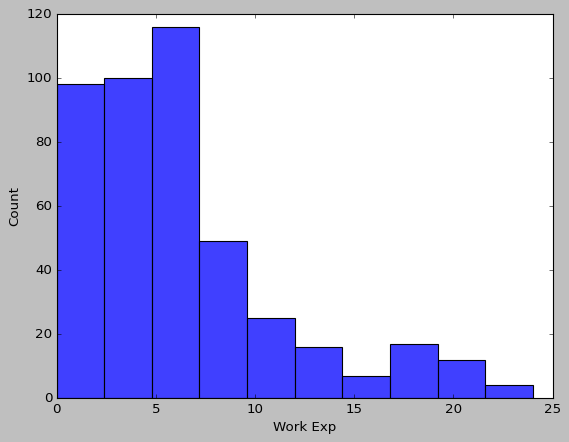

In [ ]:
sns.histplot(df['Work Exp'],bins=10);

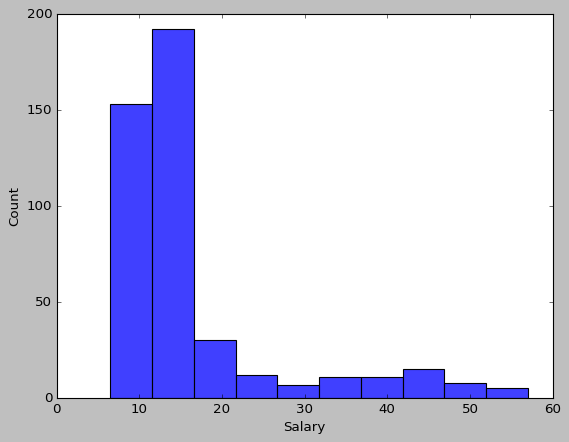

In [ ]:
sns.histplot(df['Salary'],bins=10);

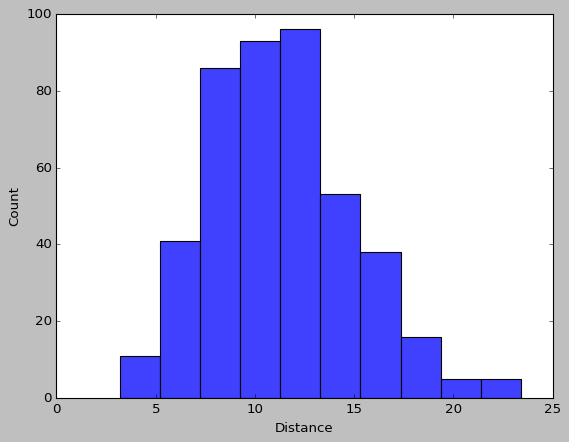

In [ ]:
sns.histplot(df['Distance'],bins=10);

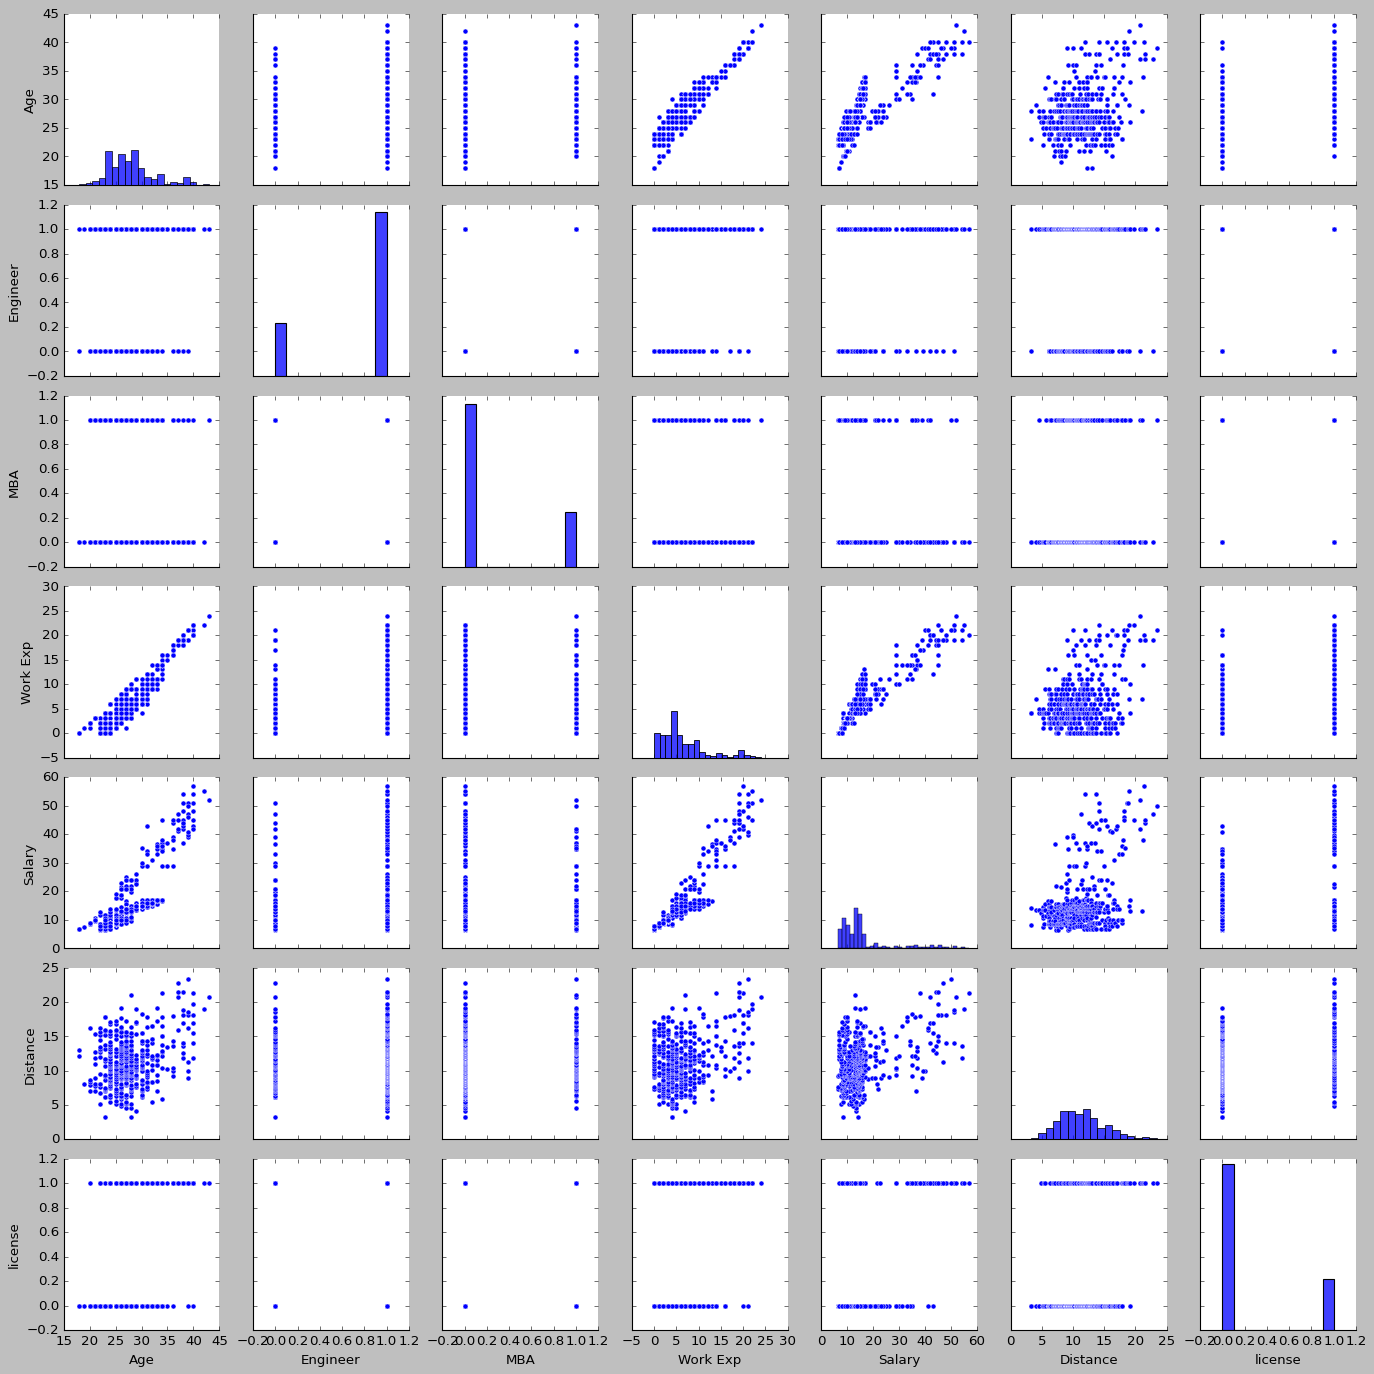

In [ ]:
sns.pairplot(df)

In [ ]:
numeric_df = df.select_dtypes(include=[float, int])


In [ ]:
correlation_matrix = numeric_df.corr()

In [ ]:
print(correlation_matrix)

               Age  Engineer       MBA  Work Exp    Salary  Distance   license
Age       1.000000  0.091935 -0.029090  0.932236  0.860673  0.352872  0.452311
Engineer  0.091935  1.000000  0.066218  0.085729  0.086762  0.059316  0.018924
MBA      -0.029090  0.066218  1.000000  0.008582 -0.007270  0.036427 -0.027358
Work Exp  0.932236  0.085729  0.008582  1.000000  0.931974  0.372735  0.452867
Salary    0.860673  0.086762 -0.007270  0.931974  1.000000  0.442359  0.508095
Distance  0.352872  0.059316  0.036427  0.372735  0.442359  1.000000  0.290084
license   0.452311  0.018924 -0.027358  0.452867  0.508095  0.290084  1.000000


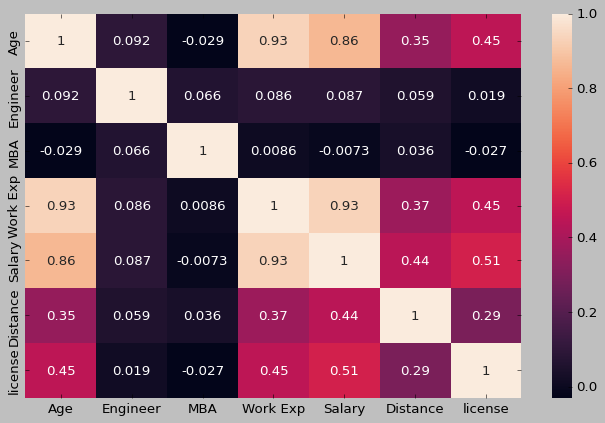

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

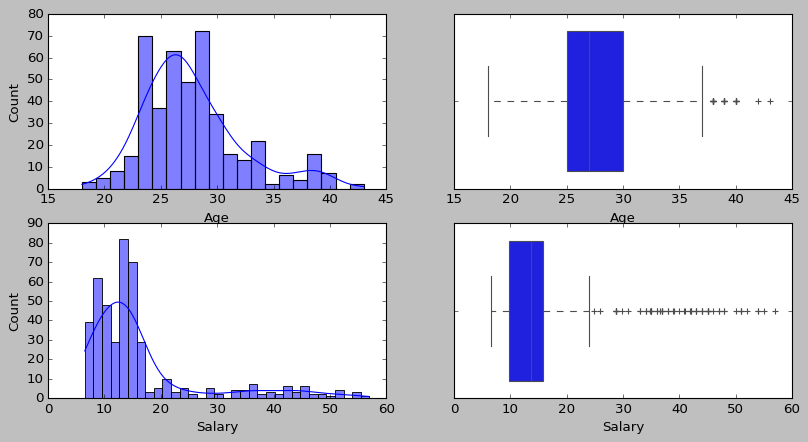

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,6)
sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['Salary'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Salary', data=df , ax=axes[1][1])
plt.show()

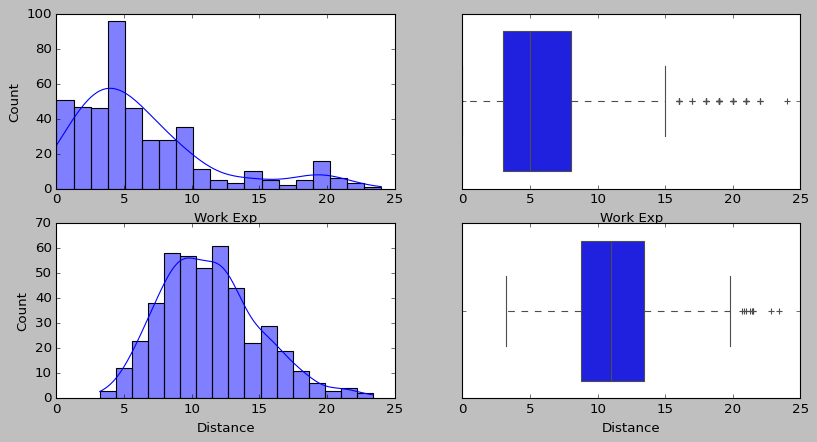

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,6)
sns.histplot(df['Work Exp'], kde=True, ax=axes[0][0])
sns.boxplot(x='Work Exp', data=df, ax=axes[0][1])
sns.histplot(df['Distance'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Distance', data=df , ax=axes[1][1])
plt.show()

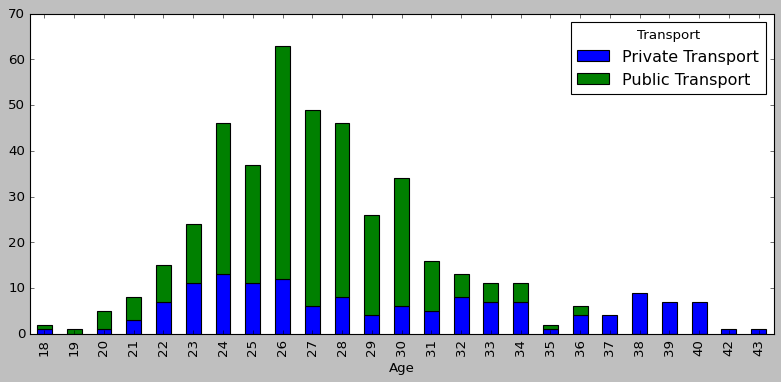

In [ ]:
ct = pd.crosstab(df['Age'],df['Transport'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (12,5))
plt.show()

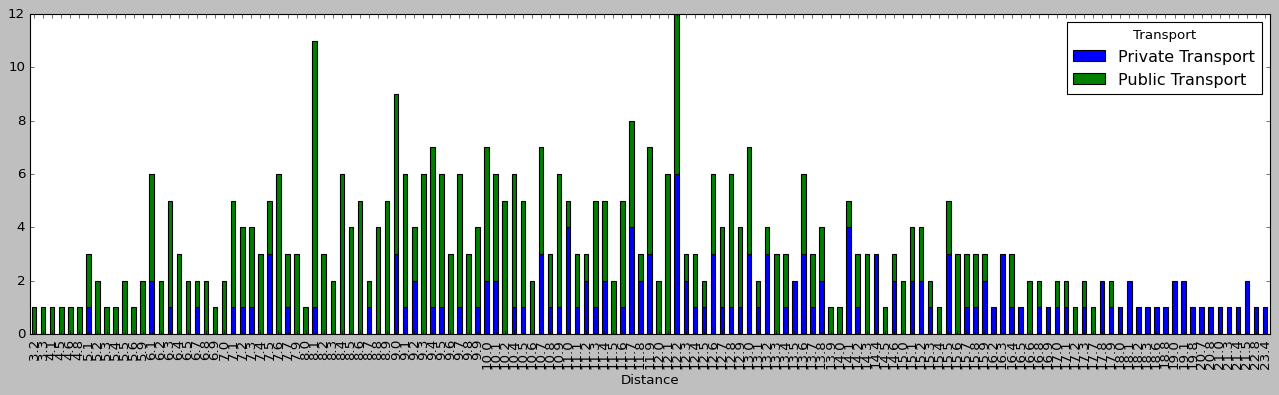

In [ ]:
ct = pd.crosstab(df['Distance'],df['Transport'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,5))
plt.show()

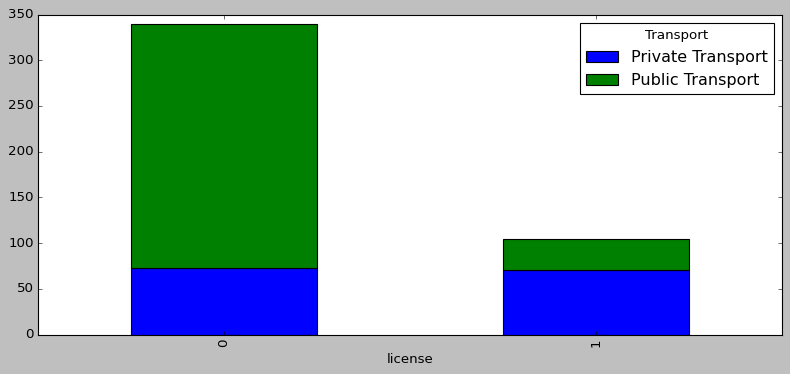

In [ ]:
ct = pd.crosstab(df['license'],df['Transport'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (12,5))
plt.show()

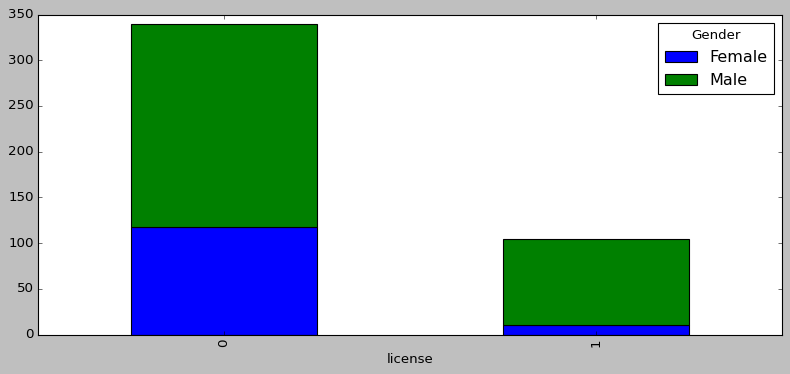

In [ ]:
ct = pd.crosstab(df['license'],df['Gender'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (12,5))
plt.show()

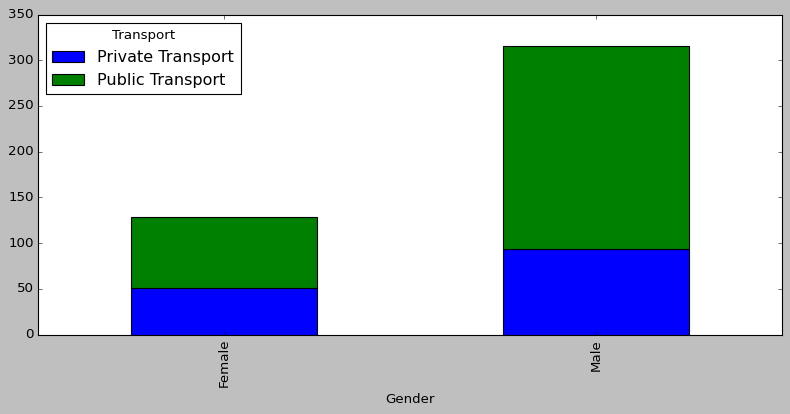

In [ ]:
ct = pd.crosstab(df['Gender'],df['Transport'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (12,5))
plt.show()

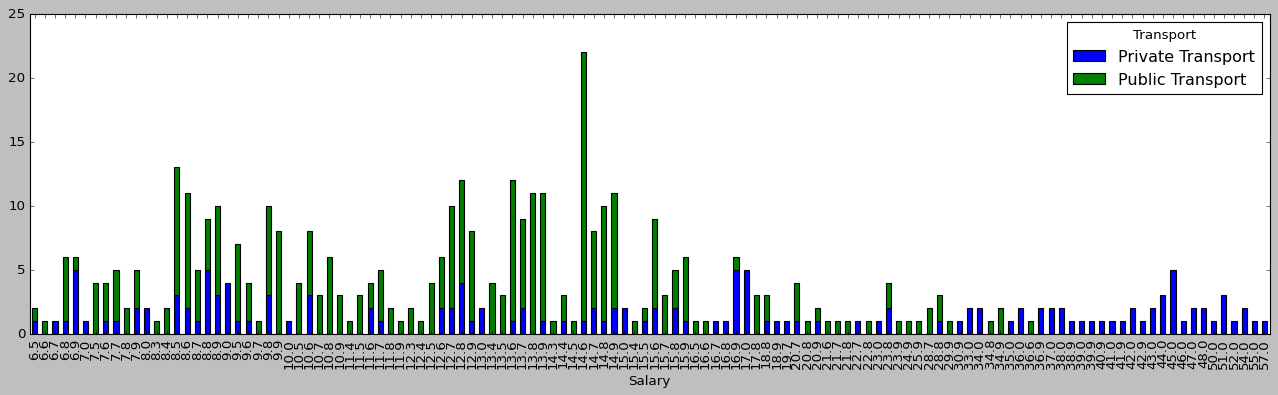

In [ ]:
ct = pd.crosstab(df['Salary'],df['Transport'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,5))
plt.show()

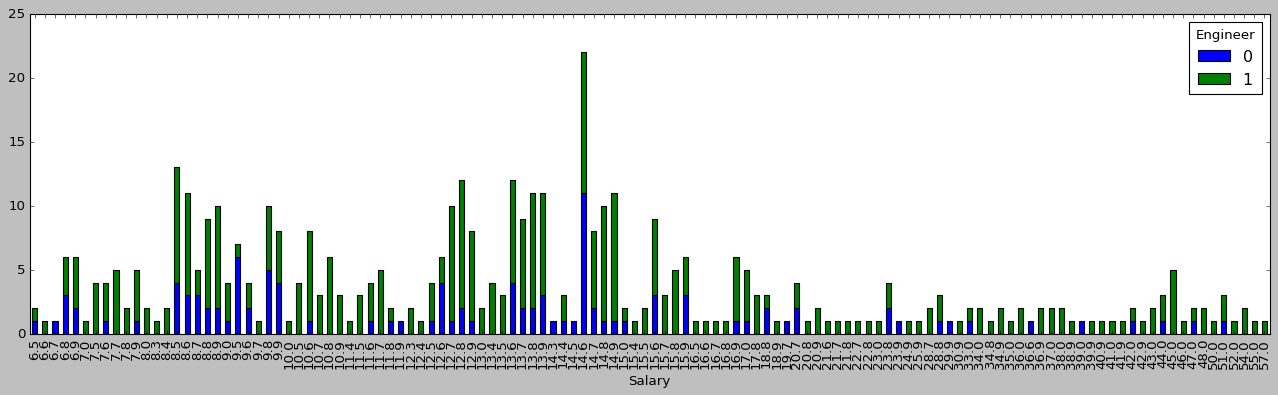

In [ ]:
ct = pd.crosstab(df['Salary'],df['Engineer'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,5))
plt.show()

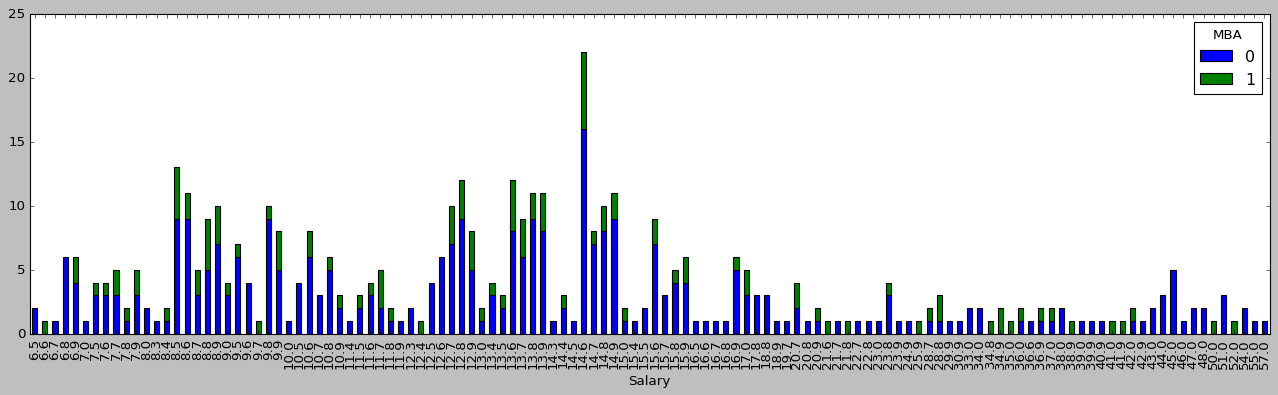

In [ ]:
ct = pd.crosstab(df['Salary'],df['MBA'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,5))
plt.show()

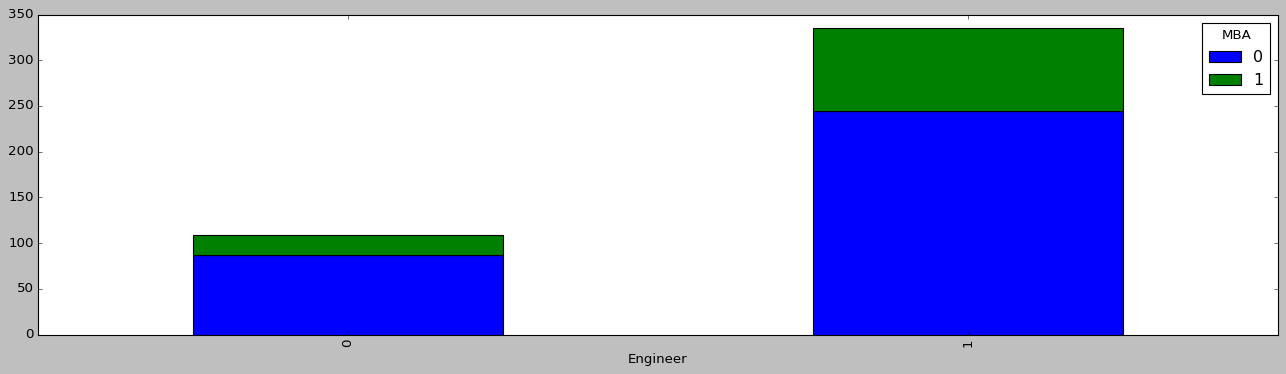

In [ ]:
ct = pd.crosstab(df['Engineer'],df['MBA'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,5))
plt.show()

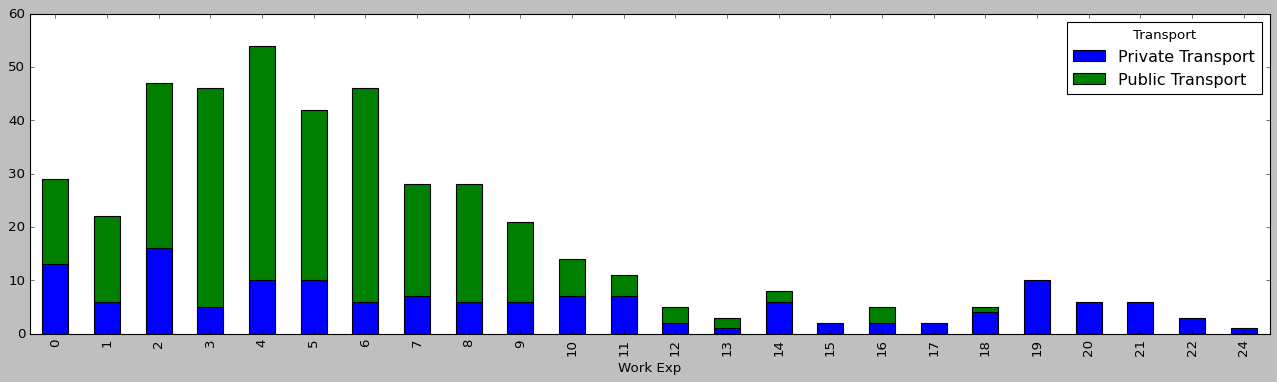

In [ ]:
ct = pd.crosstab(df['Work Exp'],df['Transport'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,5))
plt.show()

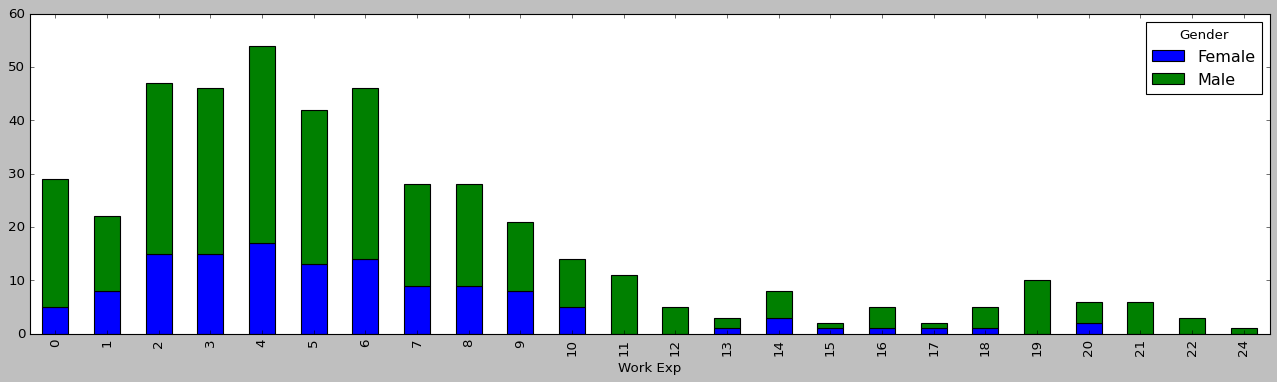

In [ ]:
ct = pd.crosstab(df['Work Exp'],df['Gender'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,5))
plt.show()

<Axes: xlabel='Work Exp', ylabel='Gender'>

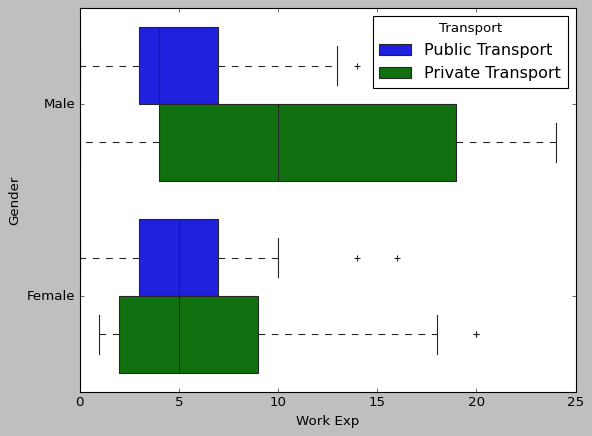

In [ ]:
sns.boxplot(x="Work Exp", y="Gender",hue='Transport', data=df, orient='h')

<Axes: xlabel='Salary', ylabel='Gender'>

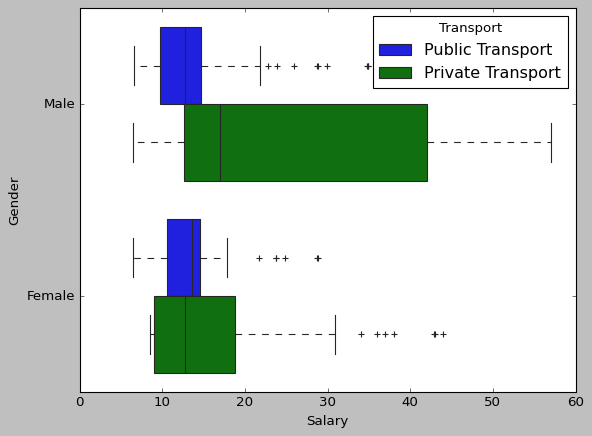

In [ ]:
sns.boxplot(x="Salary", y="Gender",hue='Transport', data=df, orient='h')

<Axes: xlabel='Salary', ylabel='Engineer'>

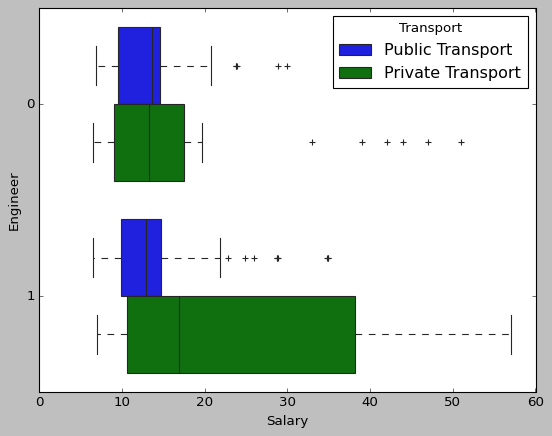

In [ ]:
sns.boxplot(x="Salary", y="Engineer",hue='Transport', data=df, orient='h')

<Axes: xlabel='Salary', ylabel='Engineer'>

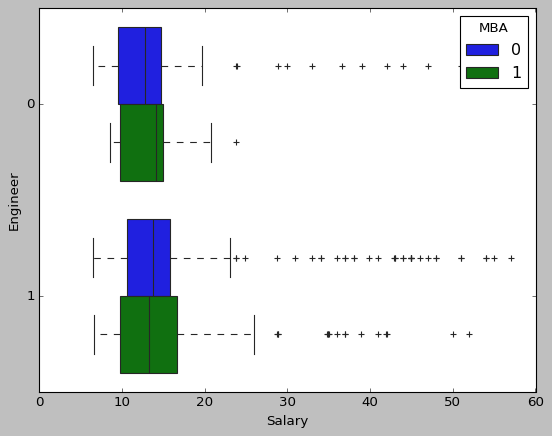

In [ ]:
sns.boxplot(x="Salary", y="Engineer",hue='MBA', data=df, orient='h')

###Treating Outliers

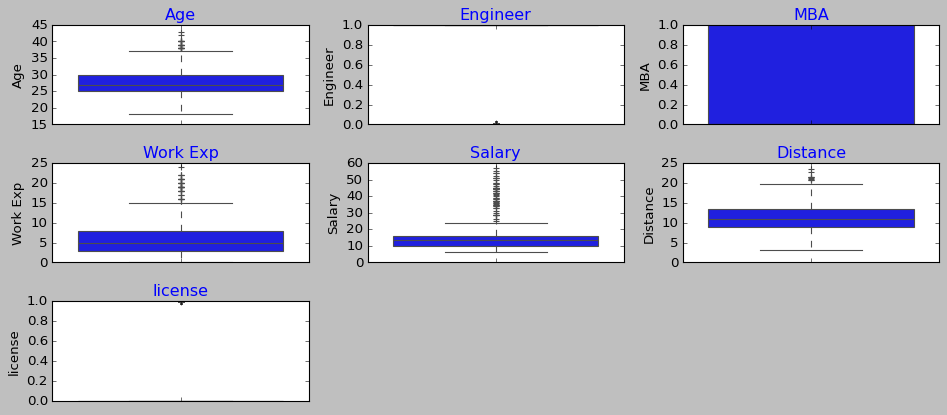

In [ ]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(4,3,(i+1))
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

In [ ]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
feature_list = ['Age','Distance','Work Exp','Salary']

In [ ]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

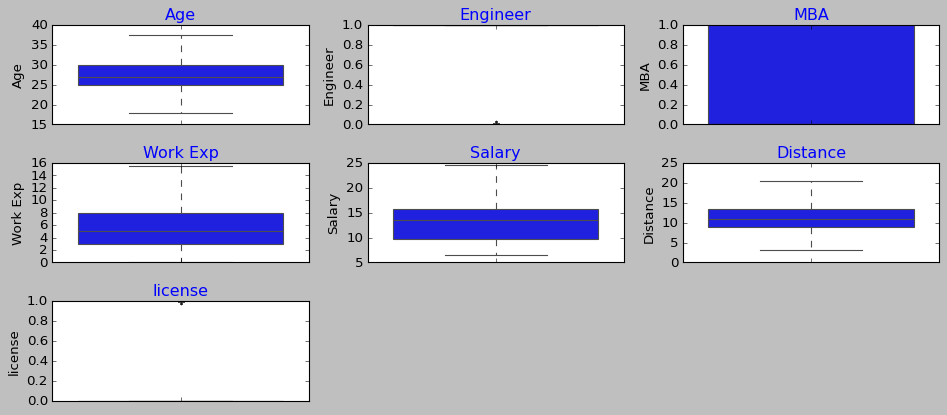

In [ ]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(4,3,(i+1))
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

###Splitting the data into Train and Test

In [ ]:
## We are replacing 'Gender' variable into binary

##df['Gender'].replace(['Female','Male'], [0,1], inplace=True)

In [ ]:
## We are replacing 'Transport' variable into binary

##df['Transport'].replace(['Private Transport','Public Transport'], [1,0], inplace=True)

In [ ]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         444 non-null    float64
 1   Engineer                    444 non-null    int64  
 2   MBA                         444 non-null    int64  
 3   Work Exp                    444 non-null    float64
 4   Salary                      444 non-null    float64
 5   Distance                    444 non-null    float64
 6   license                     444 non-null    int64  
 7   Gender_Male                 444 non-null    bool   
 8   Transport_Public Transport  444 non-null    bool   
dtypes: bool(2), float64(4), int64(3)
memory usage: 25.3 KB


In [ ]:
# Copy all the predictor variables into X dataframe
X = df_dummy.drop('Transport_Public Transport', axis=1)

# Copy target into the y dataframe.
y = df_dummy['Transport_Public Transport']

In [ ]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify= df_dummy['Transport_Public Transport'])

In [ ]:
X.head()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Gender_Male
0,28.0,0,0,4.0,14.3,3.2,0,True
1,23.0,1,0,4.0,8.3,3.3,0,False
2,29.0,1,0,7.0,13.4,4.1,0,True
3,28.0,1,1,5.0,13.4,4.5,0,False
4,27.0,1,0,4.0,13.4,4.6,0,True


In [ ]:
y.head()

,Transport_Public Transport
0,True
1,True
2,True
3,True
4,True


###Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
Log_model= LogisticRegression()
Log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
## Performance Matrix on train data set
y_train_predict_lr = Log_model.predict(X_train)
model_score = Log_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_lr))
print(metrics.classification_report(y_train, y_train_predict_lr))

0.8290322580645161
[[ 61  40]
 [ 13 196]]
              precision    recall  f1-score   support

       False       0.82      0.60      0.70       101
        True       0.83      0.94      0.88       209

    accuracy                           0.83       310
   macro avg       0.83      0.77      0.79       310
weighted avg       0.83      0.83      0.82       310



In [ ]:
## Performance Matrix on test data set
y_test_predict_lr = Log_model.predict(X_test)
model_score = Log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_lr))
print(metrics.classification_report(y_test, y_test_predict_lr))

0.8059701492537313
[[23 20]
 [ 6 85]]
              precision    recall  f1-score   support

       False       0.79      0.53      0.64        43
        True       0.81      0.93      0.87        91

    accuracy                           0.81       134
   macro avg       0.80      0.73      0.75       134
weighted avg       0.80      0.81      0.79       134



In [ ]:
# Predict probabilities for the test set
y_probs_lr = Log_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs_lr)


In [ ]:
# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)
print('AUC for the Test Data: %.3f' % roc_auc)

AUC for the Test Data: 0.773


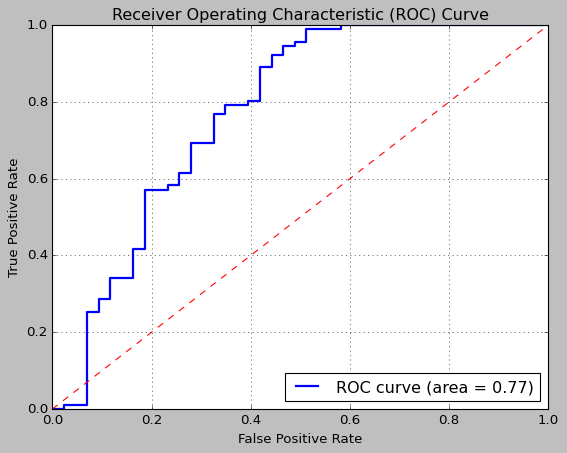

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Predict probabilities for the train set
y_probs_lr1 = Log_model.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, y_probs_lr1)
# Calculate the AUC (Area Under the Curve)
roc_auc1 = metrics.auc(fpr1, tpr1)
print('AUC for the Test Data: %.3f' % roc_auc1)

AUC for the Test Data: 0.840


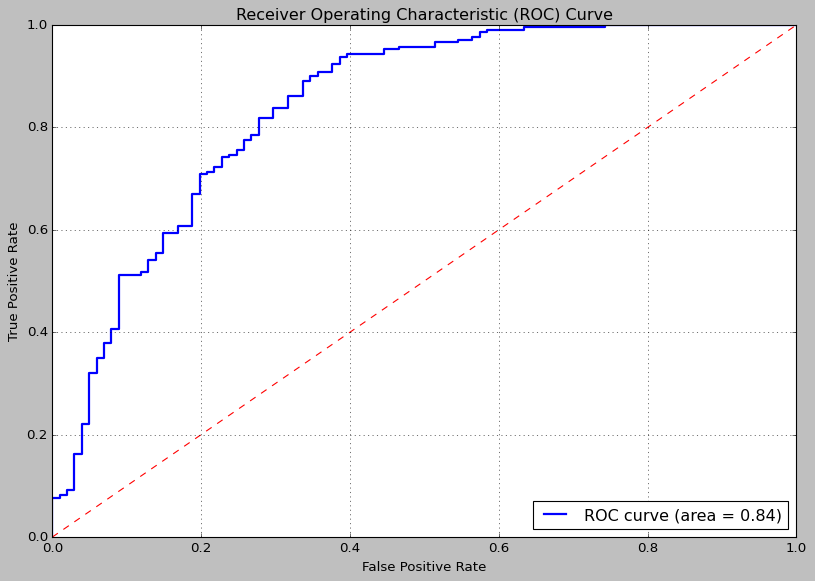

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

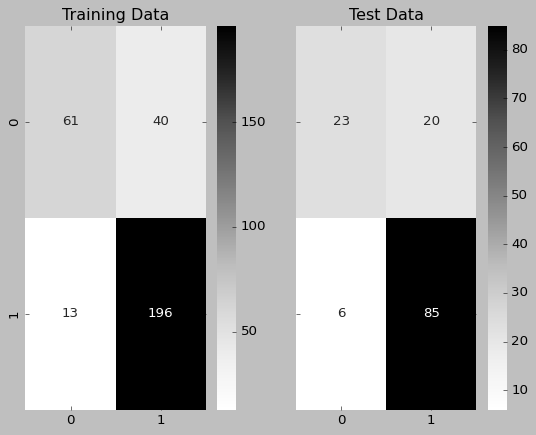

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the Training and Test Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict_lr)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict_lr)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

###Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
clf = LinearDiscriminantAnalysis() ##Build LDA Model
lda_model=clf.fit(X_train,y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict_lda = clf.predict(X_train)
model_score = clf.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_lda))
print(metrics.classification_report(y_train, y_train_predict_lda))

0.8096774193548387
[[ 58  43]
 [ 16 193]]
              precision    recall  f1-score   support

       False       0.78      0.57      0.66       101
        True       0.82      0.92      0.87       209

    accuracy                           0.81       310
   macro avg       0.80      0.75      0.77       310
weighted avg       0.81      0.81      0.80       310



In [ ]:
## Performance Matrix on test data set
y_test_predict_lda = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_lda))
print(metrics.classification_report(y_test, y_test_predict_lda))

0.7985074626865671
[[22 21]
 [ 6 85]]
              precision    recall  f1-score   support

       False       0.79      0.51      0.62        43
        True       0.80      0.93      0.86        91

    accuracy                           0.80       134
   macro avg       0.79      0.72      0.74       134
weighted avg       0.80      0.80      0.78       134



In [ ]:
# Predict probabilities for the test set
y_probs_lda = clf.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate FPR, TPR, and thresholds
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_probs_lda)

In [ ]:
# Calculate the AUC (Area Under the Curve)
roc_auc2 = metrics.auc(fpr2, tpr2)
print('AUC for the Test Data: %.3f' % roc_auc2)

AUC for the Test Data: 0.772


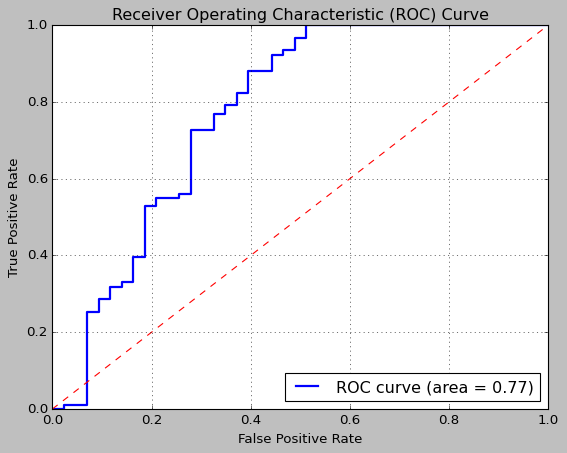

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'ROC curve (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Predict probabilities for the train set
y_probs_lda1 = clf.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, y_probs_lda1)
# Calculate the AUC (Area Under the Curve)
roc_auc3 = metrics.auc(fpr3, tpr3)
print('AUC for the Test Data: %.3f' % roc_auc3)

AUC for the Test Data: 0.838


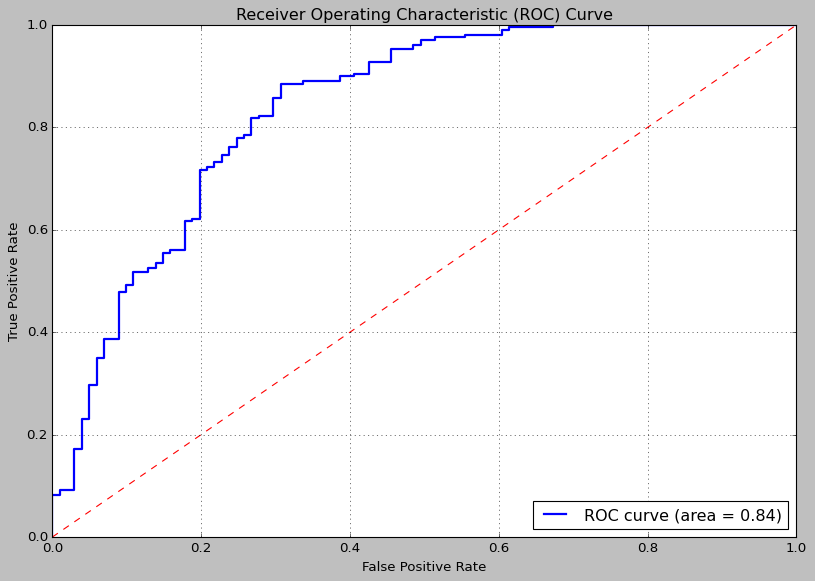

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr3, tpr3, color='blue', lw=2, label=f'ROC curve (area = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Decision Tree Classifier - CART Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
## Performance Matrix on train data set
y_train_predict_dtc = dtc.predict(X_train)
model_score = dtc.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_dtc))
print(metrics.classification_report(y_train, y_train_predict_dtc))

1.0
[[101   0]
 [  0 209]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       101
        True       1.00      1.00      1.00       209

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [ ]:
## Performance Matrix on test data set
y_test_predict_dtc = dtc.predict(X_test)
model_score = dtc.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_dtc))
print(metrics.classification_report(y_test, y_test_predict_dtc))

0.753731343283582
[[25 18]
 [15 76]]
              precision    recall  f1-score   support

       False       0.62      0.58      0.60        43
        True       0.81      0.84      0.82        91

    accuracy                           0.75       134
   macro avg       0.72      0.71      0.71       134
weighted avg       0.75      0.75      0.75       134



In [ ]:
# Predict probabilities for the test set
y_probs_dtc = dtc.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, y_probs_dtc)
# Calculate the AUC (Area Under the Curve)
roc_auc4 = metrics.auc(fpr4, tpr4)
print('AUC for the Test Data: %.3f' % roc_auc4)

AUC for the Test Data: 0.708


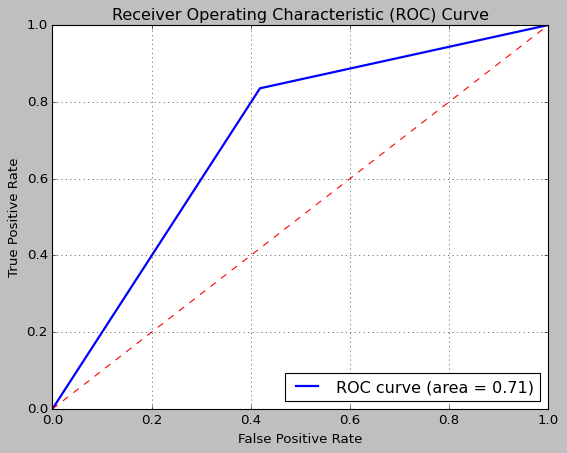

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr4, tpr4, color='blue', lw=2, label=f'ROC curve (area = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Predict probabilities for the train set
y_probs_dtc1 = dtc.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, y_probs_dtc1)
# Calculate the AUC (Area Under the Curve)
roc_auc5 = metrics.auc(fpr5, tpr5)
print('AUC for the Test Data: %.3f' % roc_auc5)

AUC for the Test Data: 1.000


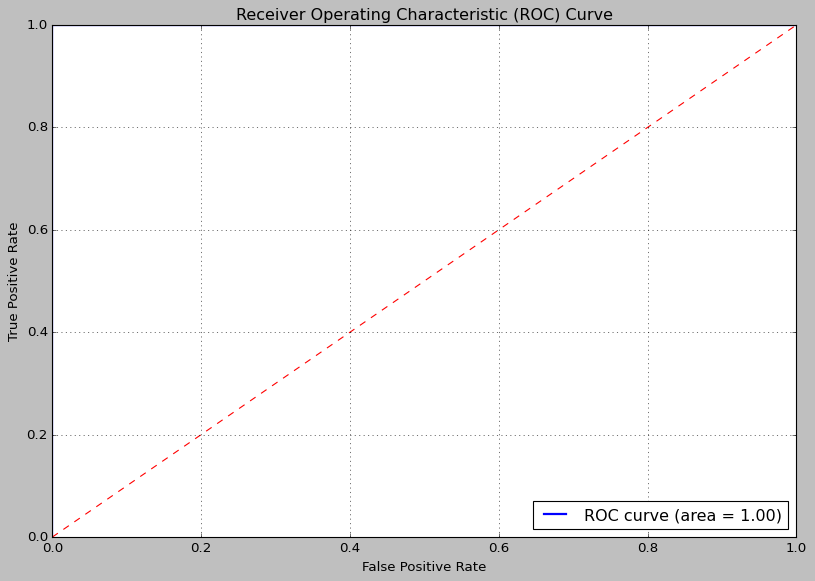

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr5, tpr5, color='blue', lw=2, label=f'ROC curve (area = {roc_auc5:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Naive Bayes Model



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
## Performance Matrix on train data set
y_train_predict_gnb = gnb.predict(X_train)
model_score = gnb.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gnb))
print(metrics.classification_report(y_train, y_train_predict_gnb))

0.7967741935483871
[[ 55  46]
 [ 17 192]]
              precision    recall  f1-score   support

       False       0.76      0.54      0.64       101
        True       0.81      0.92      0.86       209

    accuracy                           0.80       310
   macro avg       0.79      0.73      0.75       310
weighted avg       0.79      0.80      0.79       310



In [ ]:
## Performance Matrix on test data set
y_test_predict_gnb = gnb.predict(X_test)
model_score = gnb.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gnb))
print(metrics.classification_report(y_test, y_test_predict_gnb))

0.7761194029850746
[[21 22]
 [ 8 83]]
              precision    recall  f1-score   support

       False       0.72      0.49      0.58        43
        True       0.79      0.91      0.85        91

    accuracy                           0.78       134
   macro avg       0.76      0.70      0.72       134
weighted avg       0.77      0.78      0.76       134



In [ ]:
# Predict probabilities for the train set
y_probs_gnb1 = gnb.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, y_probs_gnb1)
# Calculate the AUC (Area Under the Curve)
roc_auc6 = metrics.auc(fpr6, tpr6)
print('AUC for the Test Data: %.3f' % roc_auc6)

AUC for the Test Data: 0.797


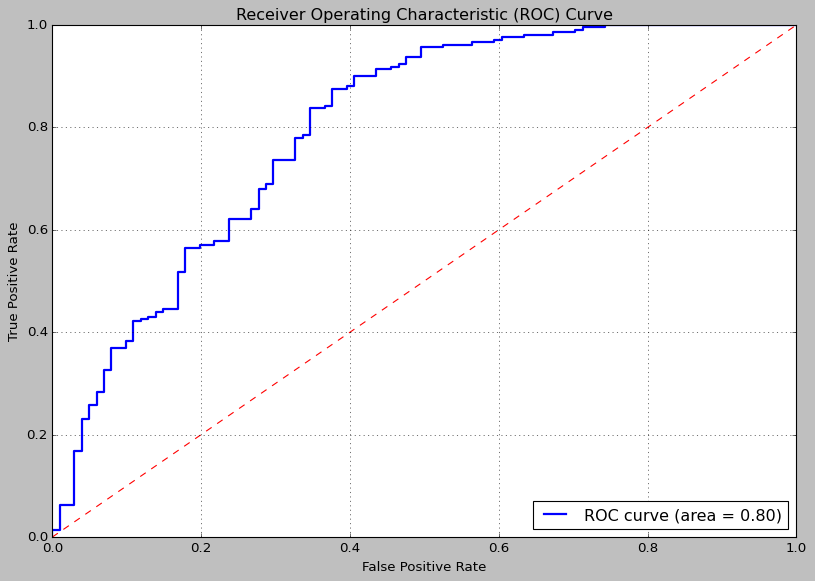

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr6, tpr6, color='blue', lw=2, label=f'ROC curve (area = {roc_auc6:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Predict probabilities for the test set
y_probs_gnb = gnb.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_test, y_probs_gnb)
# Calculate the AUC (Area Under the Curve)
roc_auc7 = metrics.auc(fpr7, tpr7)
print('AUC for the Test Data: %.3f' % roc_auc7)

AUC for the Test Data: 0.749


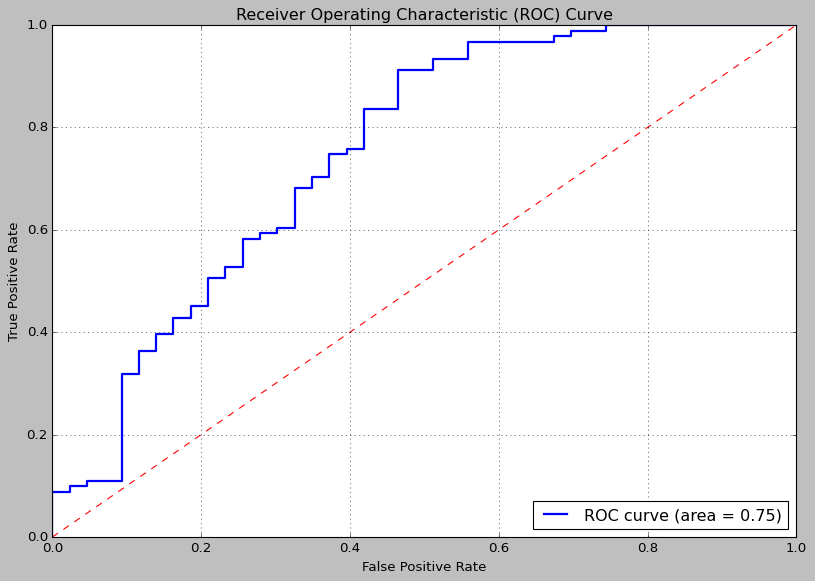

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr7, tpr7, color='blue', lw=2, label=f'ROC curve (area = {roc_auc7:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN =KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN.predict(X_train)
model_score = KNN.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_KNN))
print(metrics.classification_report(y_train, y_train_predict_KNN))

0.8451612903225807
[[ 67  34]
 [ 14 195]]
              precision    recall  f1-score   support

       False       0.83      0.66      0.74       101
        True       0.85      0.93      0.89       209

    accuracy                           0.85       310
   macro avg       0.84      0.80      0.81       310
weighted avg       0.84      0.85      0.84       310



In [ ]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN.predict(X_test)
model_score = KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_KNN))
print(metrics.classification_report(y_test, y_test_predict_KNN))

0.7835820895522388
[[19 24]
 [ 5 86]]
              precision    recall  f1-score   support

       False       0.79      0.44      0.57        43
        True       0.78      0.95      0.86        91

    accuracy                           0.78       134
   macro avg       0.79      0.69      0.71       134
weighted avg       0.78      0.78      0.76       134



In [ ]:
# Predict probabilities for the train set
y_probs_KNN1 = KNN.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, y_probs_KNN1)
# Calculate the AUC (Area Under the Curve)
roc_auc8 = metrics.auc(fpr8, tpr8)
print('AUC for the Test Data: %.3f' % roc_auc8)

AUC for the Test Data: 0.928


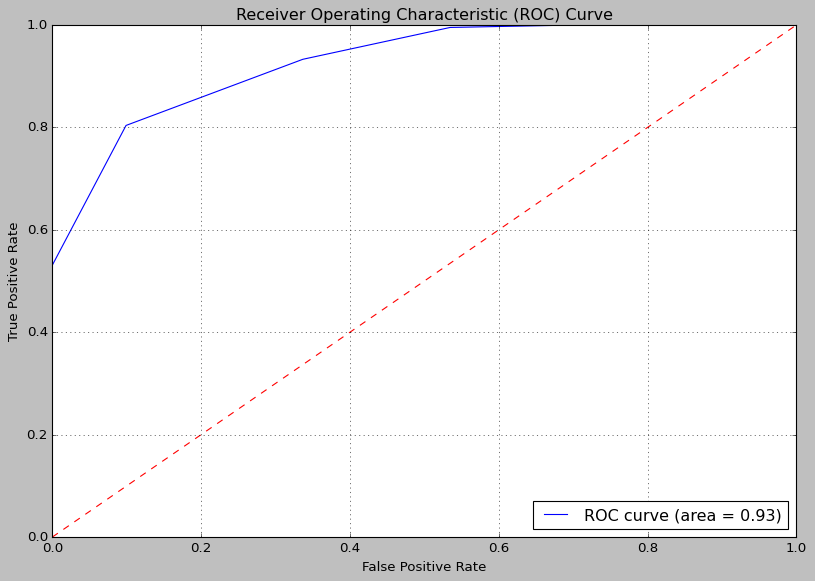

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr8, tpr8, color='blue', lw=1, label=f'ROC curve (area = {roc_auc8:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Predict probabilities for the test set
y_probs_KNN = KNN.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr9, tpr9, thresholds9 = metrics.roc_curve(y_test, y_probs_KNN)
# Calculate the AUC (Area Under the Curve)
roc_auc9 = metrics.auc(fpr9, tpr9)
print('AUC for the Test Data: %.3f' % roc_auc9)

AUC for the Test Data: 0.772


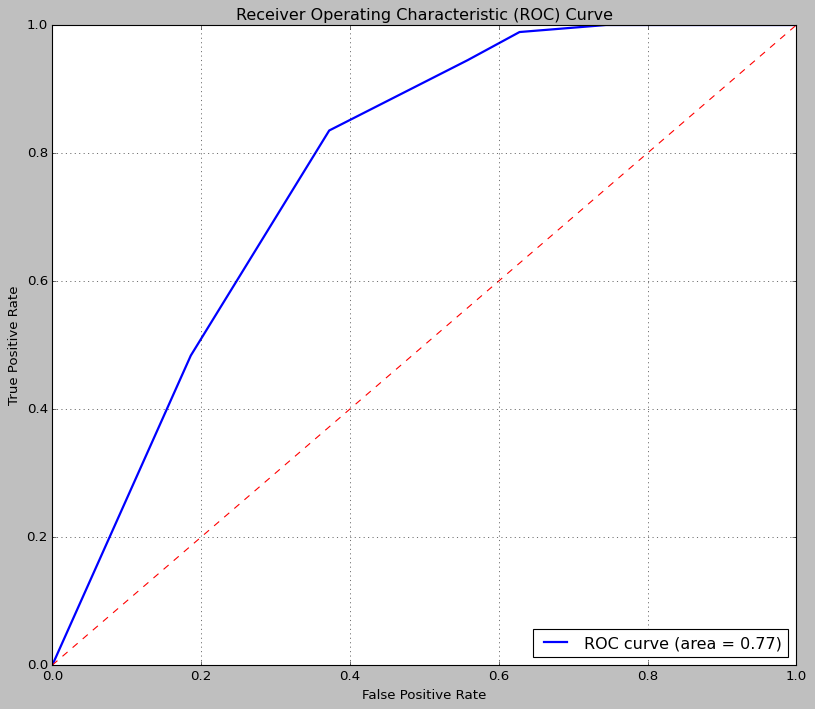

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr9, tpr9, color='blue', lw=2, label=f'ROC curve (area = {roc_auc9:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF =RandomForestClassifier(n_estimators=100,random_state=1)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict_RF = RF.predict(X_train)
model_score = RF.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_RF))
print(metrics.classification_report(y_train, y_train_predict_RF))

1.0
[[101   0]
 [  0 209]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       101
        True       1.00      1.00      1.00       209

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [ ]:
## Performance Matrix on test data set
y_test_predict_RF = RF.predict(X_test)
model_score = RF.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_RF))
print(metrics.classification_report(y_test, y_test_predict_RF))

0.8208955223880597
[[24 19]
 [ 5 86]]
              precision    recall  f1-score   support

       False       0.83      0.56      0.67        43
        True       0.82      0.95      0.88        91

    accuracy                           0.82       134
   macro avg       0.82      0.75      0.77       134
weighted avg       0.82      0.82      0.81       134



In [ ]:
# Predict probabilities for the train set
y_probs_RF1 = RF.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr10, tpr10, thresholds10 = metrics.roc_curve(y_train, y_probs_RF1)
# Calculate the AUC (Area Under the Curve)
roc_auc10 = metrics.auc(fpr10, tpr10)
print('AUC for the Test Data: %.3f' % roc_auc10)

AUC for the Test Data: 1.000


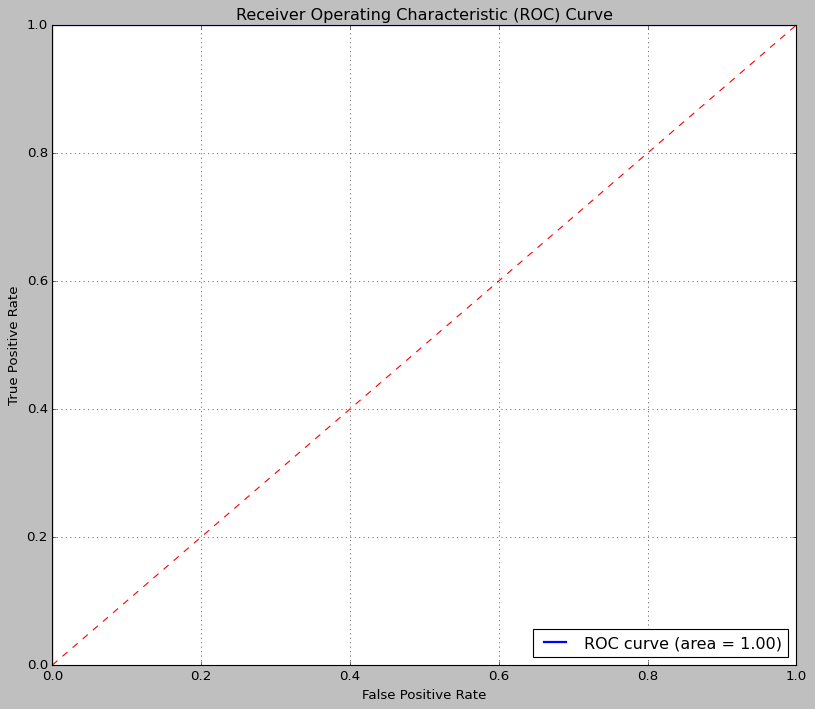

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr10, tpr10, color='blue', lw=2, label=f'ROC curve (area = {roc_auc10:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Predict probabilities for the test set
y_probs_RF = RF.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr11, tpr11, thresholds11 = metrics.roc_curve(y_test, y_probs_RF)
# Calculate the AUC (Area Under the Curve)
roc_auc11 = metrics.auc(fpr11, tpr11)
print('AUC for the Test Data: %.3f' % roc_auc11)

AUC for the Test Data: 0.886


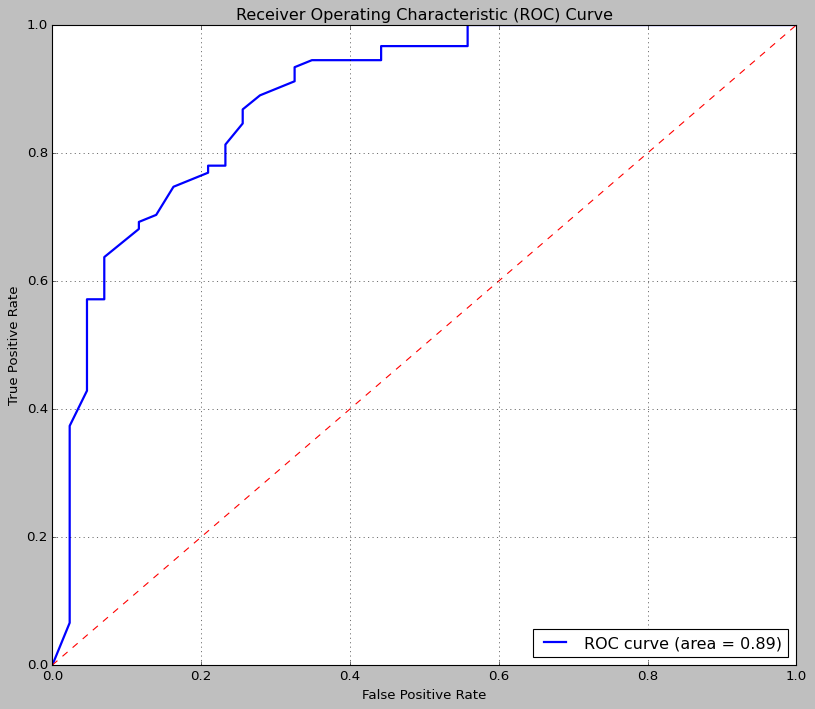

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr11, tpr11, color='blue', lw=2, label=f'ROC curve (area = {roc_auc11:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Boosting Classifier Model using Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
## Performance Matrix on train data set
y_train_predict_gb = gb.predict(X_train)
model_score = gb.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gb))
print(metrics.classification_report(y_train, y_train_predict_gb))

0.967741935483871
[[ 93   8]
 [  2 207]]
              precision    recall  f1-score   support

       False       0.98      0.92      0.95       101
        True       0.96      0.99      0.98       209

    accuracy                           0.97       310
   macro avg       0.97      0.96      0.96       310
weighted avg       0.97      0.97      0.97       310



In [ ]:
## Performance Matrix on test data set
y_test_predict_gb = gb.predict(X_test)
model_score = gb.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gb))
print(metrics.classification_report(y_test, y_test_predict_gb))

0.835820895522388
[[26 17]
 [ 5 86]]
              precision    recall  f1-score   support

       False       0.84      0.60      0.70        43
        True       0.83      0.95      0.89        91

    accuracy                           0.84       134
   macro avg       0.84      0.77      0.79       134
weighted avg       0.84      0.84      0.83       134



In [ ]:
# Predict probabilities for the train set
y_probs_gb1 = gb.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr12, tpr12, thresholds12 = metrics.roc_curve(y_train, y_probs_gb1)
# Calculate the AUC (Area Under the Curve)
roc_auc12 = metrics.auc(fpr12, tpr12)
print('AUC for the Test Data: %.3f' % roc_auc12)

AUC for the Test Data: 0.998


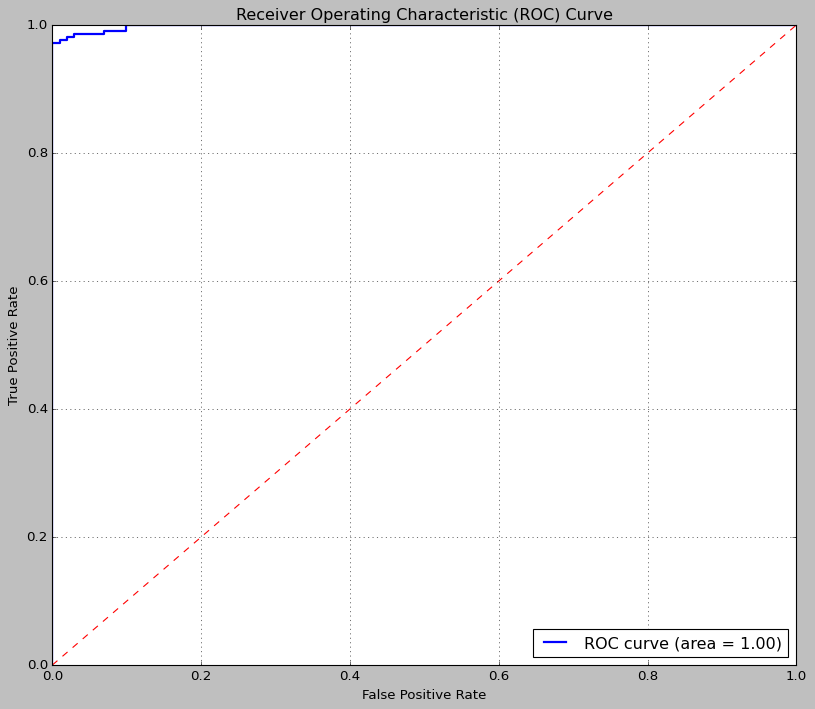

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr12, tpr12, color='blue', lw=2, label=f'ROC curve (area = {roc_auc12:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Predict probabilities for the test set
y_probs_gb = gb.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr13, tpr13, thresholds13 = metrics.roc_curve(y_test, y_probs_gb)
# Calculate the AUC (Area Under the Curve)
roc_auc13 = metrics.auc(fpr13, tpr13)
print('AUC for the Test Data: %.3f' % roc_auc13)

AUC for the Test Data: 0.865


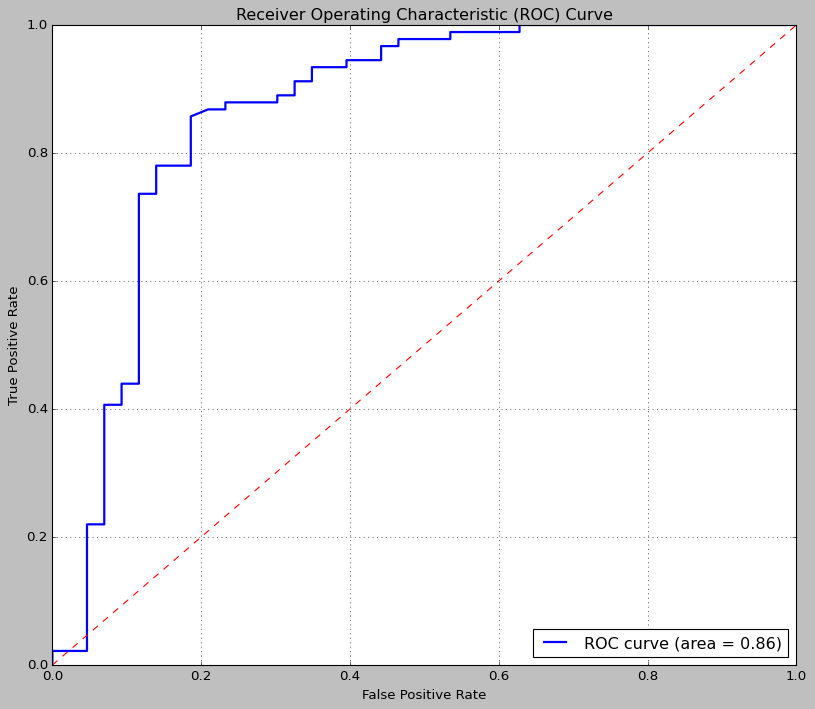

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr13, tpr13, color='blue', lw=2, label=f'ROC curve (area = {roc_auc13:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Question: Which model is the best?

After having compared all the models mentioned above I have found that all the models are performing decently well with an average score of around 85 but I choose Random Forest Model as both precision & recall is higher for both classes in Training & test Set.All the models are having an Accuracy score where the Training set is higher ascompared to Testing Set but within Industrial standards(within 10%).

Business Insights:    As we have seen from the data that a lot of respondents tend to choose Public transport

In [ ]:
feature_importance = RF.feature_importances_

In [ ]:
print(feature_importance)

[0.18818361 0.03149533 0.02381066 0.17025084 0.2293261  0.22320462
 0.07762543 0.0561034 ]


In [ ]:
features = X.columns
print(features)

Index(['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license',
       'Gender_Male'],
      dtype='object')


In [ ]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

       Feature  Importance
4       Salary    0.229326
5     Distance    0.223205
0          Age    0.188184
3     Work Exp    0.170251
6      license    0.077625
7  Gender_Male    0.056103
1     Engineer    0.031495
2          MBA    0.023811


Hence Salary level, Age, Work Ex & Distance between office & Home will help us predict the upcoming choice from an employee